In [6]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Review

0-10 mins

## Test Statistics

10-25 mins

## Pea Flowers

25-50 mins

In [17]:
null = make_array('Purple', 'Purple', 'Purple', 'White')

def test_stat(sample):
    proportion_purple = np.count_nonzero(sample == 'Purple') / len(sample)
    return abs(proportion_purple - 0.75)

total_plants = 929
purples = 705
observed_statistic = abs(purples / total_plants - 0.75) # 705 were Purple
observed_statistic

0.008880516684607098

In [4]:
# Simulating the test statistic under the null hypothesis
repetitions = 5000
sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(null, total_plants)
    sampled_stats = np.append(sampled_stats, test_stat(new_sample))

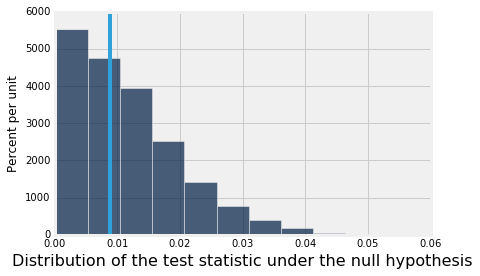

In [5]:
null_dist = Table().with_column('Distribution of the test statistic under the null hypothesis', sampled_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

In [7]:
# The P-value (an approximation based on the simulation)
np.count_nonzero(sampled_stats >= observed_statistic)/repetitions

0.5502

## Discussion Question: What Happens If...

I remove the absolute value from the test statistic?

In [31]:
def test_stat(sample):
    prop_purple = (np.count_nonzero(sample == 'Purple')
                   / len(sample)
                   - 0.75)
    return prop_purple

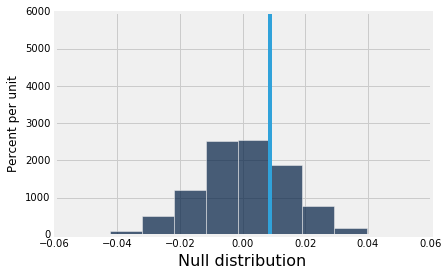

In [32]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    stat = test_stat(np.random.choice(null, total_plants))
    sample_stats = np.append(sample_stats, stat)
    
null_dist = Table().with_columns('Null distribution', sample_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

In [33]:
# compute the p-value
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)

# the previous p-value was around 0.55. Why is it different this time?

0.292

Take attendance before answering.

This test statistic is for a different alternative hypothesis! This is the alternative hypothesis: "The proportion of purple flowers is greater than 0.75."

## More questions

What if my test statistic is:

In [25]:
def test_stat(sample):
    prop_purple = (np.count_nonzero(sample == 'Purple')
                   / len(sample))
                      # - 0.75)
    return prop_purple

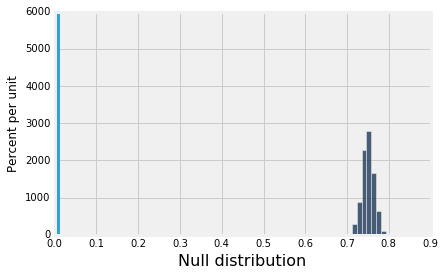

In [26]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    stat = test_stat(np.random.choice(null, total_plants))
    sample_stats = np.append(sample_stats, stat)
    
null_dist = Table().with_columns('Null distribution', sample_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

What's wrong here? Let's try again:

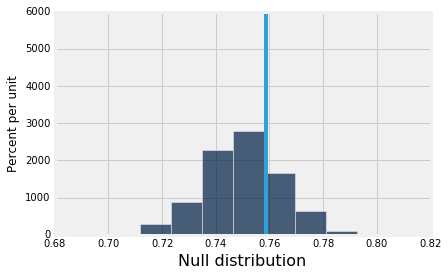

In [27]:
null_dist.hist()
_ = plt.plot([purples / total_plants, purples / total_plants], [0, 60])

In [29]:
np.count_nonzero(sample_stats >= purples / total_plants) / len(sample_stats)

0.2786

## Deflategate (for another lecture)

In [ ]:
football = Table.read_table('http://inferentialthinking.com/notebooks/football.csv')
football = football.drop('Team')
football.show()

In [ ]:
initials = np.append(np.ones(11) * 12.5, np.ones(4) * 13)
averages = (football.column(1)+football.column(2))/2
football = football.with_column(
    'Team', np.char.strip(football.column('Ball'), [' 1234567890']),
    'Average at Half', averages,
    'Estimate at Start', initials,
    'Drop', initials - averages
)
football.show()

In [ ]:
def difference_in_average_drop(t):
    averages = t.select('Team', 'Drop').group('Team', np.average).column(1)
    return averages.item(1) - averages.item(0)

observed = difference_in_average_drop(football)
observed

In [ ]:
shuffled = football.select('Drop').sample(15, with_replacement=False)
football.select('Team').with_column('Drop', shuffled.column(0))

In [ ]:
sampled_stats = make_array()

for i in np.arange(10000):
    shuffled = football.select('Drop').sample(15, with_replacement=False)
    sample = football.select('Team').with_column('Drop', shuffled.column(0))    
    sampled_stats = np.append(sampled_stats, difference_in_average_drop(sample))

In [ ]:
Table().with_column('Null distribution', sampled_stats).hist()
_ = plt.plot([observed, observed], [0, 1.4])

In [ ]:
np.count_nonzero(sampled_stats >= observed)/len(sampled_stats)